<h1>3.МОДЕЛИРОВАНИЕ ВРЕМЕННЫХ РЯДОВ</h1>


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os, glob, subprocess, sys

ipynb_files = glob.glob("/content/drive/MyDrive/Хлабынина /3/Lab_3.ipynb")

notebook_path = ipynb_files[0]
print(f"📓 Конвертируем: {notebook_path}")
!jupyter nbconvert --to markdown "{notebook_path}"
!pandoc "{notebook_path.replace('.ipynb', '.md')}" -o "{notebook_path.replace('.ipynb', '_alt.docx')}"
alt_file = notebook_path.replace('.ipynb', '_conv.docx')
if os.path.exists(alt_file):
  print(f"DOCX создан: {alt_file}")
  from google.colab import files
  files.download(alt_file)

IndexError: list index out of range

До настоящего момента мы рассматривали только вопросы сбора и извлечения временных рядов, а также их обработки. Далее будем создавать временных ряды в результате моделирования.<br>
Три основных вопроса.<br>
Во-первых, сравнить принципы моделирования временных рядов с таковыми в других способах моделирования данных, отмечая особенности процесса, вызванные необходимостью учета течения времени.<br>
Во-вторых, изучить несколько программных примеров моделирования.<br>
В-третьих, обсудить важные тенденции моделирования временных рядов.<br>
Рассмотрим примеры кода, отвечающего за генерацию временных рядов разных типов. Среди них выделяются следующие наиболее важные ситуации.<br>
• Моделирование поведения членов благотворительной организации, заключающегося в изучении почтовых сообщений и внесении добровольных пожертвований в течение всего срока членства в организации. Пример напрямую связан с данными, которые были описаны ранее year_joined.csv, donations.csv, emails.csv.<br>
• Моделирование событий в таксопарке, насчитывающем 1000 автомобилей, каждый из которых описывается с разным временем начала смены и количеством перевозимых пассажиров в течение рабочего дня.<br>
• Пошаговое моделирование состояния твердого магнитного тела при заданной температуре и размерах, описываемого строгими физическими законами.<br>

Каждый пример подчиняется одному из следующих способов моделирования временных рядов.<br>
*Эвристическое моделирование*<br>
Мы сами решаем, как должен работать мир, обеспечиваем его “разумность” и самостоятельно пишем код управления таким миром.<br>
*Моделирование дискретных событий*<br>
Создаем объекты системы, подчиняющиеся определенным правилам, а затем активизируем их, чтобы посмотреть, как такая система будет эволюционировать с течением времени.<br>
*Моделирование физических систем*<br>
Применяем физические законы, чтобы отслеживать поведение системы с течением времени.<br>


<h2>Особенности моделирования временных рядов</h2>

Моделирование данных выступает разновидностью анализа данных, которому редко обучают, но который находит широкое применение при работе с временными рядами. Это следует из одного из недостатков временных данных: никакие две точки данных в одном и том же временном ряду не могут быть точно сопоставимыми, поскольку они относятся к разному времени. Как только мы задумаемся о том, что могло бы произойти в данный момент времени, сразу же перейдем в область моделирования.<br>

Моделирование может описываться как простым, так и сложным процессами. С одной стороны, смоделированные данные можно встретить в любом учебнике по статистике, например, при изучении случайного блуждания. Обычно они генерируются в виде накопительных сумм некого случайного процесса (получаемого, например, с помощью пакета rnorm языка R) или периодической функции (в частности, синусоиды). С другой стороны, многие ученые и инженеры делают карьеру, изучая и описывая технологии моделирования данных временных рядов.<br>

Моделирование временных рядов остается активной областью исследований (необычайно требовательной к производительности вычислительного оборудования) во многих отраслях и дисциплинах.<br>

• Метеорология.<br>

• Финансы.<br>

• Эпидемиология.<br>

• Квантовая химия.<br>

• Физика плазмы.<br>

В некоторых из представленных случаев фундаментальные правила поведения системы хорошо изучены, но описать их бывает трудно из-за высокой сложности уравнений (например, в метеорологии, квантовой химии, физике плазмы). Кроме того, далеко не всегда в системе известны все исследуемые величины, а сделать точный прогноз не представляется возможным из-за стохастической нелинейной природы изучаемых процессов (например, в финансах и эпидемиологии).<br>


<h2>Моделирование и прогнозирование</h2>

Моделирование и прогнозирование — схожие задачи. В обоих случаях сначала нужно сформулировать гипотезу о параметрах и поведении базовой системы, а затем экстраполировать имеющиеся данные для получения новых точек.<br>
Наряду с этим нужно четко понимать различия между принципами моделирования и прогнозирования.<br>

• Иногда качественные наблюдения проще обрабатывать методами моделирования, а не прогнозирования.<br>

• Моделирование выполняется в определенном масштабе, что позволяет увидеть множество альтернативных сценариев, в то время как прогнозы составляются предельно точно.<br>

• Моделирование — не такое рискованное занятие, как прогнозирование. Моделирование не влияет на события реальной жизни и не вызывает потерь важных ресурсов — в первых сеансах моделирования вы можете проявлять максимум фантазии и изобретательности. Конечно, рано или поздно вам захочется обосновать модель точно так же, так это делается в прогнозировании.<br>




<h2>Моделирование с помощью программного кода</h2>

Рассмотрим три примера программ моделирования временных рядов. Изучая их, постарайтесь понять, насколько большими могут быть наборы данных, используемые в качестве источников «временных рядов», генерируемых в процессе моделирования. Не забывайте, что периодичность временной выборки может устанавливаться предельно точно и зависеть от действий человека (например, день и время совершения добровольных пожертвований) или же носить неустановленный характер и задаваться с помощью неопределенных утверждений (n-й шаг физического моделирования).<br>

Рассмотрим три примера моделирования.<br>

• Моделирование искусственного набора данных для проверки гипотезы о поведении членов организации, в частности о том, что их отношение к электронным письмам, полученным от благотворительной организации, коррелирует (или нет) с готовностью вносить благотворительные пожертвования.<br>
Это яркий пример жесткого генерирования исходных табличных данных и определения взаимосвязей между данными, устанавливаемых в программном коде с помощью циклов for и подобных им структур.<br>

• Моделирование синтезированного набора данных, используемого для изучения совокупного поведения водителей в таксопарке с учетом рабочего графика и количества перевозимых пассажиров в зависимости от времени суток. В этом наборе данных акцент делается на объектно-ориентированных атрибутах языка Python и генераторах, которые оказываются незаменимыми при тестировании и изучении поведения системы.<br>

• Моделирование физического поведения магнитного материала, заключающегося в переориентировании отдельных магнитных элементов, которые вначале пребывают в беспорядке, но в конечном итоге объединяются в хорошо упорядоченную систему. В этом примере показано, что принципы моделирования временных рядов могут основываться на физических законах, предопределяющих временной масштаб и другие характеристики модели.<br>

<h2>Самостоятельная работа</h2>

При написании программы моделирования необходимо помнить о логических правилах, определяющих поведение системы. Ниже рассматривается пример программы, в которой выполняется жесткая проверка логической целостности данных (например, из системы исключаются события, которые противоречат ее логике).<br>

В начале кода проверяется состояние членства в организации — устанавливается количество членов благотворительной организации и моментов времени вступления в нее. Каждый из членов организации участника получает определенный статус.<br>


In [ ]:
import pandas as pd
import numpy as np
import random


In [ ]:
## Статус членов организации
years = ['2014', '2015', '2016', '2017', '2018']
memberStatus = ['bronze', 'silver', 'gold', 'inactive']
memberYears = np.random.choice(years, 1000, p = [0.1, 0.1, 0.15, 0.30, 0.35])
memberStats = np.random.choice(memberStatus, 1000, p = [0.5, 0.3, 0.1, 0.1])
yearJoined = pd.DataFrame({'yearJoined': memberYears, 'memberStats': memberStats})


В этом коде сделано несколько предположений и реализовано несколько важных правил моделирования процесса. В них задаются вероятности вступления в организацию в каждом анализируемом году. Кроме того, здесь предполагается, что статус члена организации никак не связан с годом вступления в организацию. В реальном мире ситуация выглядит несколько иначе — более точным будет предположение о существовании слабой связи между этими переменными, особенно в случаях заинтересованности организации в сохранении своих членов.<br>

Далее в коде создается таблица со сведениями об открытии электронных писем членами организации в течение каждой недели. В данном случае считается, что организации свойственно следующее поведение: рассылка всем членам по три электронных письма в неделю. Кроме того, в коде определяются возможные поведенческие реакции членов организации на получение почтовых сообщений.<br>

• Никогда не открывает электронную почту<br>

• Максимальный уровень взаимодействия (постоянно открывает электронную почту)<br>

• Увеличение или уменьшение уровня взаимодействия<br>

Мы можем усложнить поведенческие правила, корректируя отдельные параметры модели в зависимости от принятия старых или создания новых предположений о ненаблюдаемых процессах, влияющих на данные.<br>


In [ ]:
NUM_EMAILS_SENT_WEEKLY = 3
## Определение функций для разных поведенческих шаблонов
def never_opens (period_rng):
    return[ ]

def constant_open_rate(period_rng):
    n, p = NUM_EMAILS_SENT_WEEKLY, np.random.uniform(0, 1)
    num_opened = np.random.binomial (n, p, len(period_rng))
    return num_opened

def increasing_open_rate(period_rng):
    return open_rate_with_factor_change(period_rng, np.random.uniform(1.01, 1.30))

def decreasing_open_rate (period_rng):
    return open_rate_with_factor_change(period_rng, np.random.uniform(0.5, 0.99))

def open_rate_with_factor_change (period_rng, fac):
    if len(period_rng) < 1:
        return[ ]
    times = np.random.randint(0, len(period_rng), int(0.1 * len(period_rng)))
    num_opened = np.zeros(len (period_rng))
    for prd in range(0, len(period_rng), 2):
        try:
            n, p = NUM_EMAILS_SENT_WEEKLY, np.random.uniform(0, 1)
            num_opened[prd:(prd + 2) ] = np.random.binomial(n, p, 2)
            p = max (min (1, p * fac), 0)
        except:
            num_opened[prd] = np.random.binomial(n, p, 1)[0]
        for t in range(len(times)):
            num_opened[times[t]] = 0
        return num_opened

Выше в коде определены функции моделирования четырех различных типов поведения. Пользователи, никогда не открывающие отправленные им электронные письма<br>
**never_opens()**<br>
Пользователи, открывающие примерно одинаковое количество писем каждую неделю<br>
**constant_open_rate()**<br>
Пользователи, открывающие меньшее количество электронных писем каждую неделю<br>**decreasing_open_rate()**<br>
Пользователи, открывающие большее количество электронных писем каждую неделю
<br>**increasing_open_rate()**<br>
Поведение членов организации, которые с течением времени становятся более активными или, наоборот, более пассивными, описывается подобным образом с помощью функции **open_rate_with_factor_change()**, основанной на функциях **increasing_open_rate()** и **decreasing_open_rate()**


Далее нам нужно определиться с моделью внесения добровольных пожертвований. Она не должна быть слишком простой, иначе это приведет к неправильному пониманию описываемых процессов. Другими словами, в модель внесения пожертвований нужно включить текущие предположения о поведении членов организации, а затем проверить, соответствуют ли они модели и наблюдениям, представленным реальными данными. Ниже приведен код описания процесса внесения пожертвований, находящегося в слабой зависимости от количества писем, открываемых членом организации в течение недели.

In [ ]:
## Внесение пожертвований
def produce_donations(period_rng, member_behavior, num_emails,use_id, member_join_year):
    donation_amounts = np.array([0, 25, 50, 75, 100, 250, 500, 1000, 1500, 2000])
    member_has = np.random.choice(donation_amounts)
    email_fraction = num_emails/(NUM_EMAILS_SENT_WEEKLY * len(period_rng))
    member_gives = member_has * email_fraction
    member_gives_idx = np.where(member_gives >= donation_amounts) [0][-1]
    member_gives_idx = max (min (member_gives_idx, len(donation_amounts) - 2), 1)
    num_times_gave = np.random.poisson (2) * (2018 - member_join_year)
    times = np.random.randint(0, len(period_rng), num_times_gave)
    dons = pd.DataFrame ({'member': [], 'amount': [ ], 'timestamp': [ ]})
    for n in range (num_times_gave) :
        donation = donation_amounts[member_gives_idx+ np.random.binomial (1, .3)]
        ts = str(period_rng [times [n] ] .start_time + random_weekly_time_delta())
        dons = pd.concat([dons, (pd.DataFrame({'member' : [use_id],'amount' : [donation],'timestamp': [ts]}))], ignore_index=True)
        if dons. shape [0] > 0:
            dons = dons [dons. amount != 0]
## Нулевые пожертвования не указываются, поскольку
## в реальной базе данных они не регистрируются
    return dons


Чтобы сделать модель более реалистичной, в коде реализуются следующие важные предположения.<br>

• Общая сумма пожертвований зависит от общего срока членства в организации.<br>

• Каждому из членов организации назначается уровень благосостояния, с помощью которого обыгрывается предположение о том, что сумма денежного взноса напрямую зависит от суммы, которую человек готов выделить на добровольные пожертвования.<br>

Поскольку поведение наших участников строго фиксируется по временным меткам, каждому члену организации нужно определить неделю и день внесения пожертвований. Напишем вспомогательную функцию выбора случайного времени в течение недели.<br>



In [ ]:
def random_weekly_time_delta () :
    days_of_week = [d for d in range(7)]
    hours_of_day = [h for h in range(11, 23)]
    minute_of_hour = [m for m in range (60)]
    second_of_minute = [s for s in range (60)]
    return pd.Timedelta(str(np.random.choice(days_of_week)) + "days") +pd.Timedelta (str(np.random.choice(hours_of_day)) + "hours" ) +pd.Timedelta(str(np.random.choice(minute_of_hour)) + "minutes") +pd.Timedelta(str(np.random.choice(second_of_minute)) + "seconds")


Заметим, что в приведенном выше коде обрабатываются только часы временной метки в диапазоне от 11 до 23 (hours_of_day = [h for h in range (11, 23) ]). Предполагается, что все члены организации проживают в смежных часовых поясах или даже в общем часовом поясе, поэтому мы не обрабатываем часы вне указанного диапазона. Таким способом мы заметно ограничиваем базовую модель поведения пользователей.

Итак, мы ожидаем увидеть унифицированное поведение наших пользователей, как если бы они все находились в одном или нескольких смежных часовых поясах. Кроме того, считается, что людям свойственно переводить пожертвования в дневное время — с позднего утра до позднего вечера, но не ночью и не ранним утром, сразу же после пробуждения.<br>

Наконец, нам нужно объединить все компоненты модели и смоделировать поведение определенного количества членов организации и соответствующих событий, возникающих только вследствие получения членства в организации, таким образом, чтобы обеспечить некоторое (но не пренебрежимо малое) влияние событий просмотра электронной почты на события внесения пожертвований.<br>


In [ ]:
behaviors = [never_opens,constant_open_rate,increasing_open_rate,decreasing_open_rate]
member_behaviors = np.random.choice(behaviors, 1000, [0.2, 0.5, 0.1, 0.2])
rng = pd.period_range('2015-02-14', '2018-06-01', freq = 'W')
emails = pd.DataFrame ({'member': [],'week': [ ],'emailsOpened': [ ]})
donations = pd.DataFrame({'member' : [],'amount' : [ ],'timestamp' : [ ] })
for idx in range(yearJoined.shape[0]):
## Генерирование случайного момента получения членства в организации
    join_date = pd.Timestamp(yearJoined.iloc[idx].yearJoined) + pd.Timedelta(str(np.random.randint(0, 365)) + 'days')
    join_date = min(join_date, pd.Timestamp('2018-06-01'))

## До вступления в организацию временные метки не предусмотрены
    member_rng = rng[rng.to_timestamp() > join_date]
    if len(member_rng) < 1:
        continue
    info = member_behaviors [idx] (member_rng)
    if len(info) == len (member_rng) :
        emails = pd.concat([emails, (pd.DataFrame({'member': [idx] * len(info),'week': [str(r. start_time) for r in member_rng],'emailsOpened' : info}))], ignore_index=True)
        donations = pd.concat([donations, (produce_donations(member_rng, member_behaviors[idx],sum(info), idx, join_date.year))], ignore_index = True)


Теперь нужно изучить временное поведение доноров, чтобы понять, как можно использовать эту информацию в дальнейшем анализе или прогнозировании.

Отобразим общую сумму ежемесячных добровольных пожертвований, вычисленных из набора данных (Рис. 3.1).


<Axes: xlabel='timestamp'>

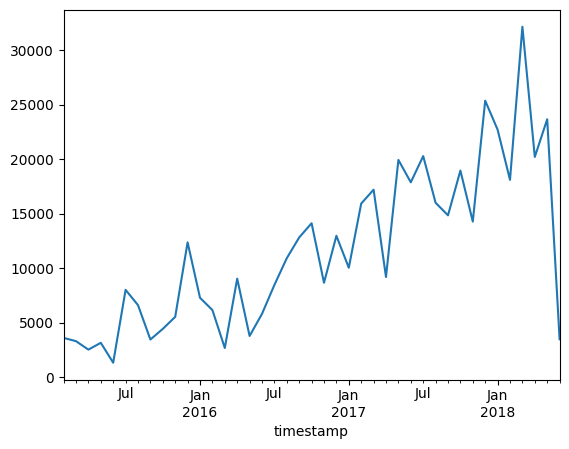

In [ ]:
df = pd.read_csv("https://drive.google.com/uc?id=1E3EN-N8QyHMHdRXoN812OVNsHbPILKrH")
df.set_index(pd.to_datetime(df.timestamp), inplace = True)
df.sort_index(inplace = True)
df.groupby(pd.Grouper(freq= 'ME')).amount.sum().plot()

*Рис. 3.1. Общая сумма ежемесячных взносов, учитываемых в наборе данных*



Построив график можно увидеть, что объем пожертвований и количество открытых электронных писем увеличились с 2015 по 2018 год. Это неудивительно, поскольку за этот же период у организации прибавилось членов, о чем свидетельствует общее количество новых членов, присоединившихся к организации за учитываемые годы. Фактически одно из допущений нашей модели заключалось в том, что мы должны сохранять информацию о каждом члене неопределенный длительный период времени после его вступления в организацию. Мы не предусмотрели возможность выхода из организации, хотя и учли, что ее члены могут потерять интерес к благотворительной деятельности (отказ от просмотра электронных писем). Однако даже в этом случае за ними сохраняется возможность внесения пожертвований. Предположение о бесконечно продолжающемся членстве в организации (и коррелированном поведении пожертвований) прекрасно отображено на полученном рисунке. Таким образом, нам следует доработать код, чтобы исключить из него нереалистичный сценарий неограниченного членства и срока внесения пожертвований.<br>
В нашем примере мы несколько отходим от классических принципов моделирования временных рядов и занимаемся скорее генерированием табличных данных. Но не нужно забывать и том, что нашей конечной целью было получение временных рядов. Поэтому генерирование табличных данных выполнялось с учетом следующих факторов и предположений.<br>

• Общее количество временных рядов.<br>

• Моделируемые временные тренды.<br>

— В случае электронной почты мы будем придерживаться трех трендов: постоянной, растущей и падающей частот просмотра электронной почты.<br>

— Внесение добровольных пожертвований считается шаблонным поведением, коррелирующим с количеством электронных писем, просматриваемым членом организации за анализируемый период времени. Это порождает упреждение, но, поскольку данные генерируются, а не собираются, таким способом описывается лояльность к организации — чем чаще просматриваются электронные письма, тем больше частота внесения пожертвований.<br>

• События просмотра электронных писем и внесения пожертвований должны приниматься в расчет только после получения членства в организации.<br>

• Данные не должны уходить в будущее в угоду их конечным потребителям, даже несмотря на то, что в моделировании такие данные всегда приветствуются.<br>
Конечно, полученный нами код не идеален. Он громоздкий и не реализует модель в задуманном виде. Более того, поскольку логика модели проверялась только на программном уровне, в ней могут встречаться ошибки пограничного характера (возникновения событий в нелогической последовательности). Для предотвращения ошибок такого типа, прежде чем приступить к разработке модели, нужно выработать общие показатели и стандарты ее достоверности.<br>
Итак, нам требуется программное обеспечение, которое сделает модель логичной и целостной. За помощью обратимся к генераторам языка Python.

<h2>Создание самоуправляемой среды моделирования</h2>

При решении многих задач от вас может потребоваться установить правила для уже имеющейся системы и понаблюдать за их соблюдением. Таким способом, например, можно проанализировать цели использования приложения широким кругом независимых пользователей или протестировать внутреннюю систему принятия решений на устойчивость к внешним воздействиям. Иными словами, вы можете отслеживать вклад отдельных агентов в совокупные показатели с течением времени. Язык Python особенно хорошо подходит для решения такого рода задач благодаря поддержке генераторов.<br>

Генераторы позволяют создать серию независимых (или зависимых!) объектов и активизировать их для изучения имеющихся возможностей без написания слишком громоздкого кода отслеживания происходящих изменений.<br>

В следующем примере мы будем моделировать поведение таксопарка. Попробуем представить, как функционирует таксопарк, в котором рабочие смены начинаются в разное время. Для этого создадим определенное количество виртуальных такси, отправим их в виртуальный город и заставим отчитываться о проделанной работе.<br>

Такое моделирование представляет собой исключительно сложную задачу. В демонстрационных целях признаем, что будем создавать более простую среду, чем та, которая, как нам кажется, отражает действительность (не забывайте о том, что все модели неправдоподобны в той или иной степени). Начнем с изучения понятия генератора в языке Python.<br>
Рассмотрим метод, используемый мною для получения идентификационного номера такси.<br>


In [ ]:
def taxi_id_number(num_taxis):
    arr = np.arange(num_taxis)
    np.random.shuffle(arr)
    for i in range(num_taxis) :
        yield arr[i]

ids = taxi_id_number(10)
print (next (ids))
print (next (ids))
print (next (ids))


7
8
2


Числа повторяются до тех пор, пока их не станет 10, после чего реализуется выход из цикла for по исключению StopIteration.<br>

Функция taxi_id_number () создает разовые объекты, не зависящие друг от друга, но сохраняющие сведения о состоянии ее выполнения. Это функция-генератор. Вы можете рассматривать генераторы как небольшие объекты, снабженные специальными переменными состояния, которые оказываются незаменимыми при создании множества схожих объектов с собственными значениями таких переменных.<br>

В задаче моделирования таксопарка разделим подвижной состав такси на смены, индикация которых выполняется с помощью генератора. Предполагается, что в середине дня на маршруты выезжает больше машин, чем в вечерние или ночные смены, определяемые разными вероятностями начала смены в указанные моменты времени.<br>


In [ ]:
def shift_info () :
    start_times_and_freqs = [(0, 8), (8, 30), (16, 15)]
    indices = np.arange(len(start_times_and_freqs))
    while True:
        idx = np.random.choice (indices, p = [0.25, 0.5, 0.25])
        start = start_times_and_freqs[idx]
        yield (start[0], start[0] + 7.5, start [1])


Обратите внимание на переменную start times and freqs. С ее определения начинается моделирование временного ряда. В нем указываем, что вероятность выхода такси на маршрут зависит от времени суток. Кроме того, каждому времени суток сопоставляется свое среднее количество поездок. Перейдем к написанию более сложного генератора, в котором предыдущие генераторы используются для установки индивидуальных параметров и расписания такси.<br>

In [ ]:
def taxi_process(taxi_id_generator, shift_info_generator) :
    taxi_id = next(taxi_id_generator)
    shift_start, shift_end, shift_mean_trips = next(shift_info_generator)
    actual_trips = round(np.random.normal (loc = shift_mean_trips, scale = 2))
    average_trip_time = 6.5/shift_mean_trips*60
# Среднее время поездки в минутах
    between_events_time = 1.0/(shift_mean_trips - 1)*60
# Город, в котором такси освобождается от клиента
    time = shift_start
    yield TimePoint(taxi_id, 'start shift', time)
    deltaT = np.random.poisson(between_events_time) / 630
    time += deltaT
    for i in range (actual_trips) :
        yield TimePoint(taxi_id, 'pick up', time)
        deltaT = np.random.poisson(average_trip_time) / 60
        time += deltaT
        yield TimePoint(taxi_id, 'drop off', time)
        deltaT = np.random.poisson(between_events_time) / 60
        time += deltaT
    deltaT = np.random.poisson(between_events_time) / 60
    time += deltaT
    yield TimePoint (taxi_id, 'end shift ', time)


Здесь с помощью генераторов сначала определяются идентификационный номер такси, время начала смены и среднее количество поездок.<br>

После этого такси отправляется по маршруту, выполняя по сформированному для него расписанию определенное количество поездок, каждая из которых совершается для следующего клиента по вызову функции next () из генератора.<br>

По сути, этот генератор создает временные ряды данных для отдельного такси. Генератор такси возвращает объекты класса TimePoint, которые определяются следующим образом.<br>


In [ ]:
from dataclasses import dataclass
@dataclass
class TimePoint:
    taxi_id: int
    name: str
    time: float

    def __lt__ (self, other) :
         return self.time < other.time


Для упрощения кода в нем используется декоратор dataclass() (требуется Python 3.7). Настоятельно рекомендуется ознакомиться с возможностями этого вспомогательного инструмента языка Python всем заинтересованным анализом и обработкой данных, применяющим его в своих проектах.<br>

Магические методы в Python Магические (или дандер) методы в языке Python, имена которых начинаются и заканчиваются двойным подчеркиванием, представляют собой встроенные методы, характерные для целевого класса. Такие методы вызываются автоматически при обращении к соответствующему объекту. Существуют реализации таких методов, которые могут быть переопределены при ручном задании для класса. Существует ряд причин, по которым вы можете захотеть сделать это. Например, в предыдущем коде нужно, чтобы сравнение объектов класса TimePoints выполнялось только по времени, но не по атрибуту taxi id или name. Термин “дандер” (dunder) происходит от “double under” (двойное подчеркивание).<br>

Кроме автоматически сгенерированного инициализатора класса TimePoint, нам понадобятся два других, более сложных метода:__ It__ (сравнение объектов класса TimePoints) и__ str__ (вывод объектов класса TimePoints, не реализованный здесь). Сравнение необходимо, поскольку сгенерированные в процессе моделирования временные точки объединяются в общую структуру данных, в которых они хранятся в определенном порядке — в очереди по приоритету. Очередь по приоритету — это абстрактный тип данных, в который объекты можно добавлять в любом порядке, но в котором они выстраиваются в порядке, устанавливаемом их приоритетом.<br>

Абстрактный тип данных — это вычислительная модель, определяемая поведением, которая характеризуется заранее оговоренным набором действий и входных данных, а также результатами применения таких действий к определенным наборам данных. Пример общеизвестного абстрактного типа данных — FIFO (“первым пришел — первым обслужен”). В нем объекты извлекаются из структуры данных в том же порядке, в котором были в нее добавлены. Способы достижения такого принципа зависят от методов реализации, а не от его определения.<br>

Итак, мы располагаем классом моделирования для настройки и запуска генераторов такси. Это нестандартный класс, поскольку обладает специальными функциями — в том числе заданными в инициализаторе — представления входных данных в виде понятной структуры данных и дальнейшей их обработки. Заметьте, что при этом единственной общедоступной является функция **run()**.<br>

In [ ]:
import queue

class Simulator:
    def __init__(self, num_taxis) :
        self.time_points = queue.PriorityQueue()
        taxi_id_generator = taxi_id_number(num_taxis)
        shift_info_generator = shift_info()
        self.taxis = [taxi_process(taxi_id_generator,shift_info_generator) for i in range(num_taxis)]
        self.prepare_run()

    def prepare_run(self) :
        for t in self.taxis:
            while True:
                try:
                    e = next(t)
                    self.time_points.put(e)
                except StopIteration:
                    break

    def run(self) :
        sim_time = 0
        while sim_time < 24:
            if self.time_points.empty():
                break
            p = self.time_points.get()
            sim_time = p.time
            print(p)



Сначала в коде создается точно такое количество генераторов, какое требуется для моделирования заданного числа машин такси. Затем совершается проход по каждому такси, связанному с классом TimePoints, в результате которого все объекты класса TimePoints располагаются в порядке приоритетности. В пользовательском классе, таком как TimePoint, приоритет объекта определяется в его инициализаторе __ lt __ сравнением текущей временной точки с начальной точкой. Таким образом, при размещении согласно приоритетности, объекты класса TimePoints упорядочиваются по времени их создания. Процесс моделирования запускается с помощью следующих команд.

In [ ]:
sim = Simulator(1000)
sim.run()

Streaming output truncated to the last 5000 lines.
TimePoint(taxi_id=np.int64(420), name='drop off', time=18.276190476190475)
TimePoint(taxi_id=np.int64(868), name='drop off', time=18.27619047619048)
TimePoint(taxi_id=np.int64(771), name='drop off', time=18.27777777777778)
TimePoint(taxi_id=np.int64(114), name='drop off', time=18.277777777777782)
TimePoint(taxi_id=np.int64(495), name='pick up', time=18.277777777777782)
TimePoint(taxi_id=np.int64(368), name='drop off', time=18.27936507936508)
TimePoint(taxi_id=np.int64(567), name='pick up', time=18.279365079365082)
TimePoint(taxi_id=np.int64(250), name='pick up', time=18.28492063492064)
TimePoint(taxi_id=np.int64(818), name='pick up', time=18.288095238095238)
TimePoint(taxi_id=np.int64(751), name='pick up', time=18.28809523809524)
TimePoint(taxi_id=np.int64(145), name='drop off', time=18.28809523809524)
TimePoint(taxi_id=np.int64(408), name='pick up', time=18.288095238095245)
TimePoint(taxi_id=np.int64(366), name='pick up', time=18.2896

Выше показан результат моделирования (в вашем случае он будет другим, так как мы не установили начальное значение — при каждом перезапуске кода оно выбирается случайным образом).

**Начальное значение генератора случайных чисел**<br>
Создавая код, отвечающий за генерирование случайных чисел, вам может понадобиться сделать его полностью воспроизводимым (например, планируя проводить модульное тестирование, которое обычно выполняется со случайными настройками, или отладку кода со суженным диапазоном изменяемых параметров). Чтобы обеспечить генерирование случайных чисел в одном и том же (неслучайном) порядке, следует определить начальное значение процесса. Это общепринятая настройка — возможность установки начального значения представлена в большинстве языков программирования.<br>
Для простоты отображения мы округлили временные точки до ближайшей минуты, хотя могли остановиться на более точных значениях. Используемое временное разрешение зависит от преследуемых целей.<br>
• Если нужно учитывать влияние машин такси на общегородской трафик, то лучше остановиться на почасовых временных точках.<br>
• Создавая мобильное приложение вызова такси, нужно исходить из соображений вычислительной нагрузки на сервер. Скорее всего, придется довольствоваться минутной или более высокой разрешающей способностью, чтобы не перегружать сетевую и вычислительную инфраструктуру.<br>
Ранее нами было принято решение регистрировать объекты класса TimePoints каждого такси в момент их “возникновения”. Иначе говоря, мы сообщаем о начале поездки в такси (посадка пассажира), не указывая момента ее окончания, хотя в его определении нет ничего сложного. Это один из способов сделать временной ряд более реалистичным в том понимании, что регистрация событий в нем ведется в режиме реального времени.<br>
Обратите внимание, что, как и в предыдущем случае, моделирование все еще не приводит к получению временных рядов. Но в нашем распоряжении находится журнал событий, который может послужить основой для временного ряда. Существует сразу несколько возможностей.<br>
• Запись результатов моделирования в файл CSV или базу данных временныхрядов.<br>
• Подключение к нашей модели одной из онлайн-моделей, обеспечивающих разработку конвейера потоковой обработки данных в режиме реального времени.<br>
• Сохранение выходных данных в файл или базу данных с последующей обработкой (с риском получения упреждения) для представления в более удобном формате, например, совмещение точек начала и окончания поездок, чтобы получить представление об их длительности в разное время суток.<br>
Наряду с проверкой гипотезы о динамичности системы управления таксопарком моделирование таких данных позволяет ответить на некоторые другие вопросы. В частности, синтезированные временные ряды могут пригодиться в следующих ситуациях.<br>
• Тестирование метрик различных моделей прогнозирования по известной динамической модели<br>
• Построение конвейера реальных данных, который в их отсутствие (ожидание) отлаживается на синтезированных данных.
Используя генераторы и другие преимущества объектно-ориентированного программирования, вы получаете в свое распоряжение более совершенные инструменты анализа временных рядов. Рассмотренный ваше пример показывает, что генераторы позволяют упростить исходную модель, а также заметно улучшить программный код.<br>
**Преимущества моделирования, основанного на использовании агентов**<br>
Продемонстрированное решение оказалось верным, но в нем проводится слишком много проверок данных на соответствие логическим правилам, принятым в системе. Если целью моделирования дискретных событий, основанных на действиях дискретных акторов, является получение источников данных для временных рядов, то рассмотрите возможность его выполнения с помощью специальных модулей, в первую очередь — с помощью модуля SimPy (https://simpy.reacithedocs.io/en/latest), снабженного удобным программным интерфейсом и обладающего достаточной гибкостью для моделирования процессов, описанных в этом разделе.<br>

<h2>Моделирование физических процессов</h2>


В еще одном сценарии моделирования поведение системы определяется физическими законами, управляемыми по собственному усмотрению. Это не обязательно должны быть физические системы, — рассмотренные далее принципы справедливы для систем многих других типов.<br>

• Специалисты, занимающиеся количественным финансовым анализом, утверждают, что поведение рынков прекрасно описывается “физическими” законами. Это же утверждение справедливо для экономических систем, хотя и в несколько иных временных масштабах.<br>

• Психологи настаивают на том, что общесоциальные принципы принятия решений основаны на “психофизических” принципах, которые могут послужить основой для “физических” правил модели, описывающей ожидаемую человеческую реакцию на различные поведенческие ситуации, изменяющиеся во времени.<br>

• Биологи отслеживают временные изменения во многих экосистемах, подверженных самым разным воздействиям.<br>

Рассмотрим простой пример моделирования физической системы, заключающийся в изучении поведения магнитного материала. Для описания такой системы воспользуемся моделью, которая в статистической физике известна как модель Изинга (Модель Изинга является хорошо изученной математической моделью статистической физики, описывающей поведение магнитных материалов. В Интернете можно найти продолжение ее описания и огромное количество примеров кода ее реализации в прикладных задачах.). Сразу заметим, что будем изучать поведение упрощенной модели Изинга. В ней предполагается, что в исходном состоянии отдельные компоненты магнитного материала имеют случайную направленность. Нам нужно инициализировать такую систему и посмотреть, как она будет эволюционировать к состоянию, в котором все магнитные компоненты выстраиваются в одном направлении под действием известных физических законов, устанавливаемых всего несколькими строками кода.<br>
Мы также изучим принципы моделирования таких систем по методу Монте-Карло с использованием марковских цепей (МСМС — Markov Chain Monte Carlo), обсудим особенности метода и тонкости его применения в рамках модели Изинга.<br>

*Моделирование по методу Монте-Карло с использованием марковских цепей*<br>
Суть метода Монте-Карло состоит в описании процесса, представленного точной математической моделью, с помощью вероятностных характеристик. Марковские цепи являются полезным дополнением к методу Монте-Карло, в наибольшей степени востребованным в моделировании временных рядов. Сам по себе метод Монте-Карло позволяет узнать только распределение ряда данных, но не отследить его изменение во времени. Именно здесь в действие вступают марковские цепи. С их помощью вычисляются вероятности перехода между состояниями, — учитывая их, рассматриваем отдельные “шаги” процесса, а не просто вычисляем общий интеграл. В результате мы получаем возможность проводить моделирование временных рядов, а не просто вычисление интеграла. (Це́пь Ма́ркова — последовательность случайных событий с конечным или счётным числом исходов, где вероятность наступления каждого события зависит только от состояния, достигнутого в предыдущем событии. Характеризуется тем свойством, что, говоря нестрого, при фиксированном настоящем будущее независимо от прошлого.).<br>

В физике метод МСМС используется, например, для изучения влияния квантовых переходов в отдельных молекулах на совокупные ансамблевые измерения, проводимые в системе в разные моменты времени. В нашем случае система описывается следующими правилами.<br>

1. В марковском процессе вероятность перехода к будущему состоянию зависит только от текущего состояния (не от прошлых состояний).<br>

2. Система имеет физическое ограничение, выражаемое через распределение Больцмана для энергии:
$\frac{T_{ij}}{T_{ji}} = e^{-b(E_i - E_j)}$
Его нужно воспринимать как отдельный
принцип реализации, даже не пытаясь понять теоретическое обоснование
(конечно, если вы не физик).<br>

Моделирование по методу МСМС реализуется следующим образом.<br>
1. Случайным образом выбираем начальное состояние каждого отдельного узла (элемента) решетки.<br>

2. На каждого временном шаге выбираем отдельный узел решетки и изменяем его спин (направление магнитного поля).<br>

3. Согласно известным физическим законам рассчитываем, насколько изменилась энергия элемента при переключении спина. Существует всего несколько возможностей.<br>

— Изменение энергии выражается отрицательным числом — осуществляется переход в более низкое энергетическое состояние, которое является наиболее предпочтительным вариантом. В этом случае состояние сохраняется и выполняется переход к следующему временному шагу.<br>

— Изменение энергии представляется неотрицательным значением — вероятность такого перехода рассчитывается как е(изменение энергии), что в полной мере соответствует правилу 2.<br>

Продолжайте выполнять шаги 2 и 3 до завершения процесса — получения наиболее вероятного состояния для проводимого совокупного измерения.<br>

Рассмотрим детали реализации модели Изинга. Представим материал, состоящий из множества объектов, расположенных в узлах двумерной сетки, каждый из которых обладает магнитным моментом (спином), характеризующимся направлением поля вверх или вниз. В начальный момент времени направление поля у всех объектов выбирается случайным образом. Нам нужно описать эволюцию системы таких объектов из случайного состояния в наиболее упорядоченное состояние, происходящую при низкой температуре (модель Изинга чаще используется для описания равновесных состояний ферромагнитных материалов, а не для изучения временных аспектов их перехода в состояние равновесия. Тем не менее мы будем рассматривать временные ряды, описывающие эволюцию системы во времени).
Инициализируем систему следующим образом.<br>


In [ ]:
##НАСТРОЙКА
N = 5 # ширина сетки
M = 5 # высота сетки
## Установка температуры
temperature = 0.5
BETA = 1/temperature


Для случайной инициализации стартового блока обратимся к служебным методам.

In [ ]:
def initRandState (N, М) :
    block = np.random.choice ([-1, 1], size = (N, M) )
    return block


Кроме того, нам нужно вычислить энергию выравнивания центрального блока относительно его соседей.

In [ ]:
def costForCenterState(state, i, j, n, m) :
    centers = state[i, j]
    neighbors = [ ( (i + 1) % n, j), ((i - 1) % n, j), (i, (j + 1) % m), (i, (j - 1) % m) ]
## Обратите внимание на использование аргумента % n,
## указывающего на периодичность условия.
## Игнорируйте его, если в нем нет необходимости, -
## это всего лишь физическое ограничение для двумерных
## систем, которые можно описать через поверхность тора
    interactionE = [state[х, у] * centers for (х, у) in neighbors]
    return np.sum(interactionE)


Определим намагниченность всего блока в данном состоянии.

In [ ]:
def magnetizationForState(state) :
    return np.sum(state)


Этапы моделирования процесса по методу МСМС, рассматриваемому ранее, реализуются следующим образом.

In [ ]:
def mcmcAdjust(state, BETA=2) :
    n = state.shape[0]
    m = state.shape[1]
    x = np.random.randint(0, n)
    y = np.random.randint(0, m)
    centers = state[x, y]
    cost = costForCenterState(state, x, y, n, m)
    if cost < 0:
        centers *= -1
    elif np.random.random() < np.exp(-cost * BETA):
        centers *= -1
    state [x, y] = centers
    return state


Для запуска процесса моделирования нам потребуются функции регистрации данных и перенастройки модели МСМС.

In [ ]:
def runState (state, n_steps, snapsteps = None):
    if snapsteps is None:
        snapsteps = np.linspace(0, n_steps, num = round(n_steps /(M * N * 100) ),dtype = np.int32)
    saved_states = []
    sp = 0
    magnet_hist = []
    for i in range(n_steps) :
        state = mcmcAdjust(state)
        magnet_hist.append(magnetizationForState(state))
        if sp < len (snapsteps) and i == snapsteps[sp]:
            saved_states.append(np.copy(state))
        sp += 1
    return state, saved_states, magnet_hist


Запуск моделирования

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def show_chessboard(matrix1, matrix2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    ax1.imshow(matrix1, cmap="gray", interpolation="nearest")
    ax1.set_title('init state')
    ax1.set_xticks([])
    ax1.set_yticks([])

    ax2.imshow(matrix2, cmap="gray", interpolation="nearest")
    ax2.set_title('final state')
    ax2.set_xticks([])
    ax2.set_yticks([])

    plt.show()

In [ ]:
#МОДЕЛИРОВАНИЕ
init_state = np.array(initRandState(N, M))
final_state = np.array(runState(np.copy(init_state), 1000)[0])

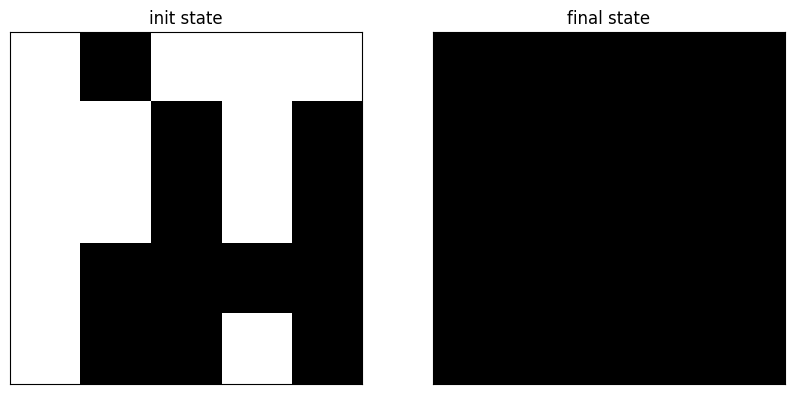

In [ ]:
show_chessboard(init_state, final_state)

Чтобы сделать определенные выводы по результатам моделирования, нужно сравнить начальное и конечное состояния системы.<br>
На рисунке показано случайно сгенерированное распределение начальных состояний. Хотя можно ожидать более равномерного их распределения, не забывайте, что при вероятностном подходе получить распределение состояний в идеальном шахматном порядке почти невозможно. Попробуйте перегенерировать начальную сетку несколько раз, чтобы убедиться в том, что строгое “случайное” или абсолютное шахматное распределение крайне маловероятны. Тем не менее обратите внимание на то, что в начальный момент времени в каждом из двух возможных состояний находится примерно половина узлов. Примите к сведению, что любые шаблоны начальных состояний, которые только вам удастся распознать, будут всего лишь плодом воображения — человеческому мозгу свойственно находить известные ему картины везде, даже там, где их нет<br>.


Передадим начальное состояние в функцию runState(), выполним моделирование для 1000 временных шагов и изучим конечный результат, показанный на рисунке. Мы получили распределение состояний через 1000 временных шагов. Результат моделирования позволяет сделать как минимум два интересных вывода. Во-первых, доминирующие состояния изменились на противоположные через 1000 шагов. Во-вторых, в числовом выражении текущее доминирующее состояние не так сильно, как противоположное доминирующее состояние в начальный момент времени. Это указывает на то, что под воздействием температуры узлы могут выходить из доминирующего состояния, даже если предыдущее состояние оказывается более предпочтительным. Чтобы лучше понять динамику процесса, нужно анализировать обобщенные характеристики, такие как намагниченность, или отслеживать временные изменения в двумерных данных по специально созданным анимационным роликам.<br>


Определим намагниченность материала в разные моменты времени для большого количества независимых сеансов моделирования (рисунок 3.4).


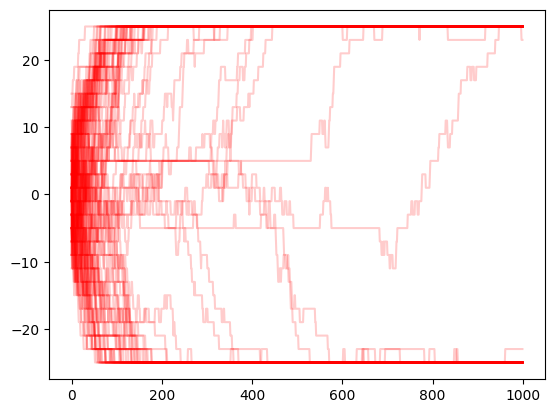

In [ ]:
import matplotlib
## Каждый временной ряд представляет отдельный результат
results = []
for i in range (100) :
    init_state = initRandState (N, M)
    final_state, states, magnet_hist = runState(init_state, 1000)
    results.append(magnet_hist)

## Построение графиков каждого ряда для оценки их перекрываемости
for mh in results:
    matplotlib.pyplot.plot(mh, 'r', alpha=0.2)


*Рис. 3.4. Сто независимых сеансов моделирования процесса изменения намагниченности системы при низкой температуре со случайным распределением состояний начальной сетки*

Изучение кривых намагничивания — это только один из способов отслеживания эволюции системы во времени. В качестве альтернативного варианта можно проводить исследование двумерных временных рядов, каждый из которых представляет данные состояния всей системы в отдельный момент времени. Или же можно проследить на каждом этапе моделирования за изменением других важных сводных характеристик, например, энтропии или общей энергии. Заметьте, что в нашей модели намагниченность и энтропия являются связанными величинами, поскольку выступают функциями распределения состояний узлов решетки, но определяют совершенно разные физические характеристики.<br>
Полученные результаты можно использовать в дальнейших исследованиях подобно тому, как это было сделано при моделировании поведения таксопарка (несмотря на сильные различия в моделях). Повышенный интерес вызывают следующее задачи.<br>

• Настройки конвейера данных на основе сгенерированных в результате моделирования временных рядов<br>

• Тестирование методов машинного обучения на синтезированных данных для изучения возможности их применения к собираемым данным до очистки и предварительной обработки<br>

• Изучение важных характеристик физической модели для лучшего понимания базовой системы.<br>

**Замечания по моделированию**

Мы рассмотрели несколько примеров моделирования сильно различающихся систем, поведение которых изменяется во времени. Нашей основной задачей было построение моделей данных, описывающих поведение потребителей (внесение пожертвований членами благотворительной организации), городской инфраструктуры (службы такси) и замкнутой физической системы (упорядочение случайно направленного магнитного поля). После детального изучения этих примеров вы почувствуете себя комфортно, рассматривая программный код моделирования более сложных процессов, а также используя полученные результаты для решения практических задач.<br>

Получив в свое распоряжение некий набор данных, вы, скорее всего, выдвигали предположения о его структуре и возможности практического использования, но не имели возможности их проверить. Моделирование данных позволяет получить ответы на очень многие вопросы. Результаты моделирования подтверждают или опровергают самые смелые предположения о данных, основанные на умозрительных рассуждениях и изучении количественных характеристик.<br>

**Статистическое моделирование**

Статистическое моделирование — это традиционный способ изучения временных рядов. Оно выполняется в задачах с известными динамическими характеристиками стохастической системы и позволяет оценить неизвестные параметры или понять, как сделанные предположения влияют на процесс оценки таких параметров (наглядный пример приведен в последующих главах). Для многих физических систем статистическое моделирование оказывается предпочтительнее других методов оценки.<br>

Статистическое моделирование временных рядов также находит широкое применение, например, в задачах нахождения количественных показателей оценки точности модели. Точность традиционных статистических моделей, таких как ARIMA, рассчитывается согласно строго заданным аналитическим формулам.<br>
Это означает, что при описании систем с помощью известных статистических методов численную оценку дисперсии и точности модели можно получить без проведения большого количества сеансов моделирования.<br>

**Модели глубокого обучения**

Моделирование временных рядов методами глубокого обучения — это новая, но весьма многообещающая дисциплина науки о данных. С помощью технологий глубокого обучения во временных рядах можно обнаружить сложные динамические процессы, зачастую скрытые для понимания даже опытных специалистов по анализу данных. Это же является недостатком технологии — чаще всего специалисты по анализу данных не имеют ни малейшего представления о принципах изучения обнаруженных динамических процессов.<br>

Алгоритмы глубокого обучения предоставляют широкие возможности по защите исследуемых данных. Например, с помощью методов глубокого обучения можно синтезировать временные ряды неоднородных данных, впоследствии обрабатываемых медицинскими приложениями, на основе реальных временных рядов, уязвимых к утечке конфиденциальной информации. Такой защищенный набор данных, если он действительно будет получен, станет неоценимым источником медицинских сведений, лишенным недостатков исходных временных рядов.<br>

**Дополнительные источники**

Cristobal Esteban, Stephanie L. Hyland, and Gunnar Ratsch, “Real-Valued (Medical) Time Series Generation with Recurrent Conditional GANs,” unpublished manuscript, last revised December 4, 2017, https://perma.cc/Q69W-L44Z

Авторы работы описывают принципы использования генеративно-состязательных сетей для синтезирования реалистично выглядящих разнородных медицинских временных рядов. Это пример использования методов глубокого обучения для получения этически выверенных, юридически обоснованных и (хочется верить) защищенных от утечек наборов медицинских данных, которые могут широко использоваться при разработке медицинских приложений, основанных на алгоритмах машинного и глубокого обучения.<br>

Gordon Reikard and W, Erick Rogers, “Forecasting Ocean Waves: Comparing a Physicsbased Model with Statistical Models,” Coastal Engineering 58 (2011): 409-16, https://perma.cc/89DJ-ZENZ<br>

В этой статье проводится сравнение двух совершенно разных моделей описания системы — статистической и физической. Авторы работы приходят к выводу, что в задачах прогнозирования выбор модели определяется временной шкалой анализируемых данных. Хотя статья посвящена преимущественно прогнозированию, рассматриваемые в ней вопросы имеют самое непосредственное отношение к моделированию, основанному на тех же принципах, что и прогнозирование.<br>

Wolfgang Hardie, Joel Horowitz, and Jens-Peter Kreiss, “Bootstrap Methods for Time Series,” International Statistical Review / Revue Internationale de Statistique 71, no. 2 (2003): 435-59, https: //perma.cc/6CQA-EG2E

Критический взгляд на недостатки статистических методов моделирования данных с временными зависимостями от 2005 года. В характерной для научных сотрудников манере авторы объясняют, почему бутстрап-методы анализа демонстрируют низкую эффективность в процессе анализа временных рядов по сравнению с данными других типов. В статье также рассматриваются наиболее перспективные (на момент ее написания) методы анализа временных данных. Технологии моделирования не сильно изменились с тех пор, и статья остается актуальной и сегодня.